In [30]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
#warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] 
matplotlib.rcParams['xtick.labelsize'] 
matplotlib.rcParams['ytick.labelsize'] 
matplotlib.rcParams['text.color'] = 'k'

In [31]:
path_to_data = 'https://raw.githubusercontent.com/esnet/daphne/master/Multivariate-TimeSeries/One_year_data_sarima/L11.csv?token=AKKJU5WW6DEB5ICTFWMMLEK5V43YE'

In [32]:
df = pd.read_csv(path_to_data)

In [33]:
df.head()

,Hours,L11
0,01/01/2018 08:00,1.723817
1,01/01/2018 09:00,1.378636
2,01/01/2018 10:00,1.147793
3,01/01/2018 11:00,1.185312
4,01/01/2018 12:00,1.127621


In [34]:
df.tail()

,Hours,L11
8755,01/01/2019 03:00,1.261636
8756,01/01/2019 04:00,1.164768
8757,01/01/2019 05:00,1.645621
8758,01/01/2019 06:00,1.556023
8759,01/01/2019 07:00,1.679094


In [35]:
df.describe()

,L11
count,8760.000000
mean,2.435285
std,0.747010
min,0.000000
25%,1.956148
50%,2.334638
75%,2.796824
max,8.648894


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
Hours    8760 non-null object
L11      8760 non-null float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [37]:
#df.isnull().sum()

In [38]:
#df.dtypes

Text(0.5,1,'bost_amst_out Link Speed Over Time In Hours')

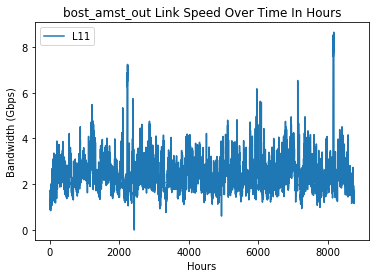

In [39]:
df.plot()
plt.xlabel('Hours')
plt.ylabel('Bandwidth (Gbps)')
plt.title('bost_amst_out Link Speed Over Time In Hours')

In [40]:
df['Hours'] =  pd.to_datetime(df['Hours'], infer_datetime_format=True)

In [41]:
df.dtypes

Hours    datetime64[ns]
L11             float64
dtype: object

In [42]:
df = df.set_index('Hours')

In [43]:
df.head()

,L11
Hours,
2018-01-01 08:00:00,1.723817
2018-01-01 09:00:00,1.378636
2018-01-01 10:00:00,1.147793
2018-01-01 11:00:00,1.185312
2018-01-01 12:00:00,1.127621


In [44]:
df.tail()

,L11
Hours,
2019-01-01 03:00:00,1.261636
2019-01-01 04:00:00,1.164768
2019-01-01 05:00:00,1.645621
2019-01-01 06:00:00,1.556023
2019-01-01 07:00:00,1.679094


In [45]:
#average_daily_speed = df.resample('H').mean()
hourly_speed = df.resample('H').mean()

In [46]:
hourly_speed.head()

,L11
Hours,
2018-01-01 08:00:00,1.723817
2018-01-01 09:00:00,1.378636
2018-01-01 10:00:00,1.147793
2018-01-01 11:00:00,1.185312
2018-01-01 12:00:00,1.127621


In [47]:
# average_daily_speed.plot()
# plt.title('Average daily Bandwidth untilization (Gbps)')
# plt.show()
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"

In [48]:
# # Seaconal Decomposition of the Network Trace Data
# from pylab import rcParams
# rcParams['figure.figsize'] = 12, 8
# decomposition = sm.tsa.seasonal_decompose(average_daily_speed, model='additive')
# fig = decomposition.plot()
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# plt.tight_layout()
# plt.show()

In [49]:
# Define the p, d and q parameters to take any value between 0 and 2
# Generate all different combinations of p, q and q triplets
# Generate all different combinations of seasonal p, q and q triplets
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [50]:
print('Possible Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Possible Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [51]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [52]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [263]:
#Lowest AIC : SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:709.973547601076

In [54]:
mod = sm.tsa.statespace.SARIMAX(hourly_speed,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8197      0.004    202.259      0.000       0.812       0.828
ma.L1         -0.9933      0.001   -818.248      0.000      -0.996      -0.991
ar.S.L12       0.0833      0.010      8.291      0.000       0.064       0.103
ma.S.L12      -1.0000      3.416     -0.293      0.770      -7.696       5.696
sigma2         0.1648      0.563      0.293      0.770      -0.939       1.268


In [55]:
# results.plot_diagnostics()
# plt.show()
# plt.tight_layout()

In [56]:
pred = results.get_prediction(start=pd.to_datetime('2018-12-20'), dynamic=False)
pred_ci = pred.conf_int()

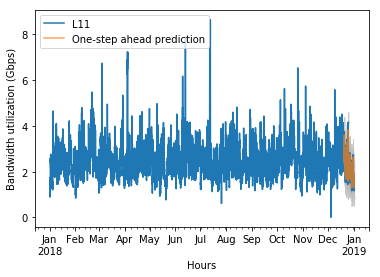

In [57]:
ax = hourly_speed['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead prediction', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Hours')
ax.set_ylabel('Bandwidth utilization (Gbps)')
plt.legend()

plt.show()

In [58]:
#df_mse = pd.read_csv('mse_aofa_lond_in.csv')
#df_mse = df_mse.set_index('Days')
#y_forecasted = df_mse['y_forecasted']
#y_truth = df_mse['y_truth']
#mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

In [59]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-12-20'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [60]:
# ax = average_daily_speed['2018':].plot(label='observed')
# pred_dynamic.predicted_mean.plot(label='Dynamic prediction', ax=ax)

# ax.fill_between(pred_dynamic_ci.index,
#                 pred_dynamic_ci.iloc[:, 0],
#                 pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

# ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-01'), average_daily_speed.index[-1],
#                  alpha=.1, zorder=-1)

# ax.set_xlabel('Date')
# ax.set_ylabel('Bandwidth utilization (Gbps)')

# plt.legend()
# plt.show()

In [73]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

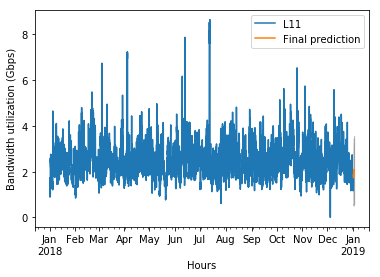

In [74]:
ax = hourly_speed.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Final prediction')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Hours')
ax.set_ylabel('Bandwidth utilization (Gbps)')

plt.legend()
plt.show()

In [ ]:
print(pred_ci)

In [141]:
y_forecasted = pred.predicted_mean
y_truth = average_daily_speed['2018-12-20':]

In [142]:
y_forecasted=pd.DataFrame(y_forecasted, columns = ['L1-bandwidth'])

In [143]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is L1-bandwidth    25610.1
dtype: float64
The Root Mean Squared Error of our forecasts is L1-bandwidth    160.03
dtype: float64
